## 控制迷宫寻宝机器人

在这个项目中，你将使用刚刚学到的知识，尝试根据要求，编写代码，来控制一个机器人，在模拟环境中行走，并找到目标宝藏。

机器人所在的模拟环境中，会包含这样几个因素：机器人的起点、障碍物、宝藏箱。你的任务包括：

1. 分析模拟环境的数据
2. 控制机器人随机行动
3. （可选）控制机器人走到终点


* 一个良好的含有注释的代码，可以让你的程序可读性更高，尝试为你自己的代码添加相应的注释。

---

---

## 第一节 分析模拟环境的数据

首先，只有足够了解机器人所在的环境，我们的机器人才能成功找到目标宝藏，因此首先我们来对机器人所在环境的数据进行分析。在这个部分，会考察你对数据结构、控制流的了解。


### 1.1 理解模拟环境数据的储存格式

首先我们思考这样的问题：如何存储模拟环境的数据呢？

我们将我们的模拟环境抽象成一个格子世界，每个格子按照坐标编号进行标记；每个格子中会有四个情况，分别为普通格子（可通行）、机器人的起点（可通行）、障碍物（不可通行）、宝藏箱（目标点）。例如，一个模拟环境就可以抽象成3行4列的格子世界，并按这按这样的方法进行存储：
```
environment = [[0,0,0,2], 
               [1,2,0,0],
               [0,2,3,2]]
```
我们用了一个列表来保存虚拟世界的数据。外层列表中的每一个元素依然是一个列表，它代表模拟环境中每行的数据。而对于这个列表中的每个元素都是一个数，它们的含义是：
- 0: 普通格子（可通行）
- 1: 机器人的起点（可通行）
- 2: 障碍物（不可通行）
- 3: 宝藏箱（目标点）

那么，根据上述的数据，这个迷宫的第二行第一列，是我们机器人的起点。

__注：我们描述的迷宫的坐标位置（第一行第一列），和迷宫下标索引的值（如 `(0,0)`）是不一样的，请注意下标的问题。__


如下的代码，使用了辅助函数，读取了模拟环境的数据，并保存在了 `env_data` 变量中。

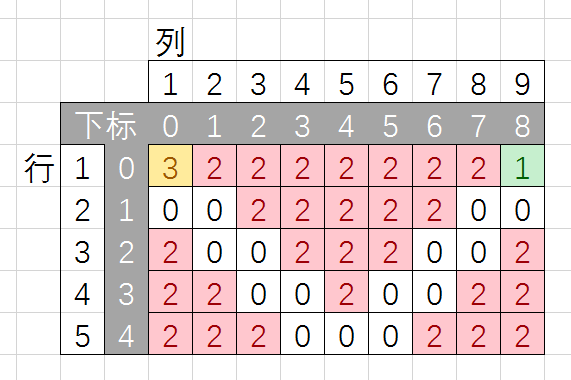



In [138]:
import helper

env_data = helper.fetch_maze()

maze-id 1-1532495390
[[3, 2, 2, 2, 2, 2, 2, 2, 1],
 [0, 0, 2, 2, 2, 2, 2, 0, 0],
 [2, 0, 0, 2, 2, 2, 0, 0, 2],
 [2, 2, 0, 0, 2, 0, 0, 2, 2],
 [2, 2, 2, 0, 0, 0, 2, 2, 2]]


---


**任务1：**在如下代码中，请写代码获得这些值：

1. 模拟环境的长和宽
2. 模拟环境中第3行第6列元素

In [139]:
#TODO 1模拟环境的行数
rows = len(env_data)
      
#TODO 2模拟环境的列数
columns = len(env_data[0]) 

#TODO 3取出模拟环境第三行第六列的元素
row_3_col_6 = env_data[2][5]

print("迷宫共有", rows, "行", columns, "列，第三行第六列的元素是", row_3_col_6)

迷宫共有 5 行 9 列，第三行第六列的元素是 2


---

## 1.2 分析模拟环境数据

接着我们需要对模拟环境的中的数据进行分析。请根据如下的指示，计算相应的值。

---

**任务2：**在如下代码中，请计算模拟环境中，第一行和第三列的障碍物个数。

提示：*可以用循环完成。*

In [140]:
#TODO 4计算模拟环境中，第一行的的障碍物个数。
number_of_barriers_row1 = env_data[0].count(2)

#TODO 5计算模拟环境中，第三列的的障碍物个数。
number_of_barriers_col3 = env_data[2].count(2)

print("迷宫中，第一行共有", number_of_barriers_row1, "个障碍物，第三列共有", number_of_barriers_col3, "个障碍物。")

迷宫中，第一行共有 7 个障碍物，第三列共有 5 个障碍物。


---

**任务3：**在如下代码中：

1. 创建一个名为 `loc_map` 的字典，它有两个键值，分别为 `start` 和 `destination`，对应的值分别为起点和目标点的坐标，它们以如 `(1,1)` 的形式保存为元组。
2. 从字典中取出 `start` 对应的值，保存在 `robot_current_loc` 对应的变量中，这个变量表示小车现在的位置。


In [141]:
def find_loc(num):
    for i in range(len(env_data)):
        for index, value in enumerate(env_data[i]):
            if value == num:
                return i, index
    
loc_map = {'start':find_loc(1), 'destination': find_loc(3)} #TODO 6按照上述要求创建字典

robot_current_loc = loc_map['start'] #TODO 7保存机器人当前的位置
print(robot_current_loc) # 打印机器人的起始位置 
print(loc_map['destination']) #打印目标的位置

(0, 8)
(0, 0)



---

---

## 第二节 控制机器人随机漫步

在这一步中，你需发出指令，控制机器人在环境中随机行动。它会考察你对控制流、调用函数的知识。



## 2.1 控制机器人行动

我们的机器人能够执行四个动作：向上走 `u`、向下走 `d`、向左走 `l`、向右走 `r`。但是，由于有障碍，很多时候机器人的行动并不能成功。所以在这里，你需要实现一个函数，来判断机器人在某个位置，执行某个移动动作是否可行。

---

**任务4：**在下方代码中，实现名为 `is_move_valid_special` 的函数，它有两个输入，分别为机器人所在的位置坐标 `loc`，以及即将执行的动作 `act`，如 `(1,1)` 及 `u`。接着它的返回是一个布尔值，表明小车在 `loc` 位置下，是否可以执行动作 `act`。


提示1：*可以读取上方定义的 `env_data` 变量，来读取模拟环境的数据。*

提示2：*在实现函数后，请删去下方的 `pass` 代码。*

提示3：*我们需要处理边界的情况，即机器人走到了虚拟环境边界时，是不能够走出虚拟环境的。*

In [142]:
def is_move_valid_sepcial(loc, act):
    """
    Judge wether the robot can take action act
    at location loc.
    
    
    Keyword arguments:
    loc -- tuple, robots current location
    act -- string, robots meant action

[[3, 2, 2, 2, 2, 2, 2, 2, 1],
 [0, 0, 2, 2, 2, 2, 2, 0, 0],
 [2, 0, 0, 2, 2, 2, 0, 0, 2],
 [2, 2, 0, 0, 2, 0, 0, 2, 2],
 [2, 2, 2, 0, 0, 0, 2, 2, 2]]
 1 None
2 d
3 False
4 None
    """
    #TODO 8
    # 分别是向上向下，向左向右的位置更新。 需要注意下标和位置之间的值的关系
    # loc是下标，从0开始， rows是从1开始的 
    if act == 'u': 
        if 0<= loc[0]-1 <= rows-1: 
            if env_data[loc[0]-1][loc[1]] == 2:
                return False
            else:
                return True
            return False
       
            
    if act == 'd':
        if 0<= loc[0]+1 <= rows-1: 
            if env_data[loc[0]+1][loc[1]] == 2:
                return False
            else:
                return True
            return False
    # 向左右的移动位置更新
    
    if act == 'l':
        if 0<= loc[1]-1 <= columns-1: 
            if env_data[loc[0]][loc[1]-1] == 2:
                return False
            else:
                return True
            return False
            
    if act == 'r':
        if 0<= loc[1]+1 <= columns-1: 
            if env_datas[loc[0]][loc[1]+1] == 2:
                return False
            else:
                return True
            return False
    

---

**任务5：**在下方代码中，重新实现一个名为 `is_move_valid` 的函数，它有三个输入，分别为模拟环境的数据 `env_data`、机器人所在的位置坐标 `loc`、以及即将执行的动作 `act`。它的返回值与此前一样，是一个布尔值，表明小车在给定的虚拟环境中的 `loc` 位置下，是否可以执行动作 `act`。

In [143]:
def is_move_valid(env_data, loc, act):
    """
    Judge wether the robot can take action act
    at location loc.
    
    Keyword arguments:
    env -- list, the environment data
    loc -- tuple, robots current location
    act -- string, robots meant action
    """
    #TODO 9
    if act == 'u': 
        if 0<= loc[0]-1 <= rows-1: 
            if env_data[loc[0]-1][loc[1]] == 2:
                return False
            else:
                return act 
            return False
        return False
    
    elif act == 'd':
        if 0<= loc[0]+1 <= rows-1: 
            if env_data[loc[0]+1][loc[1]] == 2:
                return False
            else:
                return act 
            return False
        return False
        
    # 向左右的移动位置更新
    elif act == 'l':
        if 0<= loc[1]-1 <= columns-1:
            if env_data[loc[0]][loc[1]-1] == 2:
                return False
            else:
                return act
            return False
        return False
        
    elif act == 'r':
        if 0<= loc[1]+1 <= columns-1: 
            if env_data[loc[0]][loc[1]+1] == 2:
                return False
            else:
                return act 
            return False
        return False

  

---

**任务6：**请回答：**在任务4及任务5中的实现的两个函数中，`env_data` 这个变量有什么不同？**

提示：_可以尝试从变量作用域的角度回答该问题。_



**回答：** （请在这里填写你的回答）

---

## 2.2 机器人可行动作

---

**任务7：**编写一个名为 `valid_actions` 的函数。它有两个输入，分别为虚拟环境的数据 `env_data`，以及机器人所在的位置 `loc`，输出是一个列表，表明机器人在这个位置所有的可行动作。

提示：*可以尝试调用上方定义的`is_move_valid`函数。*


In [153]:
## TODO 10 从头定义、实现你的函数

def valid_actions(env_data, loc):
    act_list = []
    act = is_move_valid(env_data, loc, 'u') 
#     print('1',act)
    if act is not False:
        act_list.append(act)
       
        
    act = is_move_valid(env_data, loc, 'd') 
#     print('2',act)
    if act is not False:
        act_list.append(act)
        
        
    act = is_move_valid(env_data, loc, 'l') 
#     print('3',act)
    if act is not False:
        act_list.append(act)
        
        
    act = is_move_valid(env_data, loc, 'r')
#     print('4',act)
    if act is not False:
        act_list.append(act)
        
    print(act_list)
    return act_list
    

In [154]:
valid_actions(env_data, robot_current_loc)

['d']


['d']

---

## 2.3 移动机器人

当机器人收到一个动作的时候，你机器人的位置应发生相应的变化。

**任务8：**编写一个名为 `move_robot` 的函数，它有两个输入，分别为机器人当前所在的位置 `loc` 和即将执行的动作 `act`。接着会返回机器人执行动作之后的新位置 `new_loc`。

In [155]:
##TODO 11 从头定义、实现你的函数
def move_robot(loc, act):
    if act == 'u': 
        if 0<= loc[0]-1 <= rows: 
            if env_data[loc[0]-1][loc[1]] == 2:
                return False
            else:
                new_loc = (loc[0]-1, loc[1])
                return new_loc
            
    if act == 'd':
        if 0<= loc[0]+1 <= rows: 
            if env_data[loc[0]+1][loc[1]] == 2:
                return False
            else:
                new_loc = (loc[0]+1, loc[1])
                return new_loc

    # 向左右的移动位置更新
    if act == 'l':
        if 0<= loc[1]-1 <= columns: 
            if env_data[loc[0]][loc[1]-1] == 2:
                return False
            else:
                new_loc = (loc[0], loc[1]-1)
                return new_loc
            
    if act == 'r': 
        if 0<= loc[1]+1 <= columns: 
            if env_data[loc[0]][loc[1]+1] == 2:
                return False
            else:
                new_loc = (loc[0], loc[1]+1)
                return new_loc
    

---

## 2.4 随机移动机器人

接着，我们尝试在虚拟环境中随机移动机器人，看看会有什么效果。

**任务9：**编写一个名为 `random_choose_actions` 的函数，它有两个输入，分别为虚拟环境的数据 `env_data`，以及机器人所在的位置 `loc`。机器人会执行一个300次的循环，每次循环，他会执行以下任务：

1. 利用上方定义的 `valid_actions` 函数，找出当前位置下，机器人可行的动作；
2. 利用 `random` 库中的 `choice` 函数，从机器人可行的动作中，随机挑选出一个动作；
3. 接着根据这个动作，利用上方定义的 `move_robot` 函数，来移动机器人，并更新机器人的位置；
4. 当机器人走到终点时，输出“在第n个回合找到宝藏！”。

提示：如果机器人无法在300个回合内找到宝藏的话，试试看增大这个数字，也许会有不错的效果 :P

In [160]:
##TODO 12 从头实现你的函数
import random
def random_choose_actions(env_data, robot_current_loc):    
    for i in range(301):
        act_list = valid_actions(env_data, robot_current_loc)
        act = random.choice(act_list)
        robot_current_loc = move_robot(robot_current_loc, act)
        print(robot_current_loc)
        if robot_current_loc == loc_map['destination']:
            print(i,'ok找到目标')
            break


In [168]:
# 运行
random_choose_actions(env_data, robot_current_loc)

['d']
(1, 8)
['u', 'l']
(1, 7)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(1, 7)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(1, 7)
['d', 'r']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(1, 7)
['d', 'r']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(1, 7)
['d', 'r']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(0, 8)
['d']
(1, 8)
['u', 'l']
(1, 7)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(2, 7)
['u', 'l']
(2, 6)
['d', 'r']
(3, 6)
['u', 'l']
(3, 5)
['d', 'r']
(4, 5)
['u', 'l']
(4, 4)
['l', 'r']
(4, 3)
['u', 'r']
(4, 4)
['l', 'r']
(4, 5)
['u', 'l']
(4, 4)
['l', 'r']
(4, 3)
['u', 'r']
(4, 4)
['l', 'r']
(4, 3


---

---

## （可选）第三节 控制机器人走到终点

## 3.1 控制机器人走到终点

在这里，你将综合上述的知识，编码控制机器人走到终点。这个任务对刚刚入门的你来说可能有些挑战，所以它是一个选做题。

**任务10**：尝试实现一个算法，能够对给定的模拟环境，输出机器人的行动策略，使之能够走到终点。

提示：_你可以尝试参考 [A星算法](https://zh.wikipedia.org/wiki/A*%E6%90%9C%E5%AF%BB%E7%AE%97%E6%B3%95) 。_
以及以下参考资料：
* https://baike.baidu.com/item/A%2A算法

* https://blog.csdn.net/hitwhylz/article/details/23089415

In [166]:
##TODO 13 实现你的算法
def a_star():
    pass

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。